In [1]:
import pandas as pd
import numpy as np

In [2]:
crop=pd.read_csv('fertilizer_recommendation.csv')
crop.head()

,Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
crop.rename(columns={'Soil Type':'Soil_type'})

,Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [4]:
crop.nunique()

Temparature        14
Humidity           13
Soil_Moisture      41
Soil_Type           5
Crop_Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer_Name     7
dtype: int64

In [5]:
crop.shape

(99, 9)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Soil_Moisture    99 non-null     int64 
 3   Soil_Type        99 non-null     object
 4   Crop_Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer_Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [7]:
crop.isnull().sum()

Temparature        0
Humidity           0
Soil_Moisture      0
Soil_Type          0
Crop_Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer_Name    0
dtype: int64

In [8]:
crop.duplicated().sum()

0

In [9]:
crop.describe()

,Temparature,Humidity,Soil_Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [10]:
corr=crop.corr()
corr

C:\Users\owner\AppData\Local\Temp\ipykernel_4500\3583348575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=crop.corr()


,Temparature,Humidity,Soil_Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Soil_Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


<Axes: >

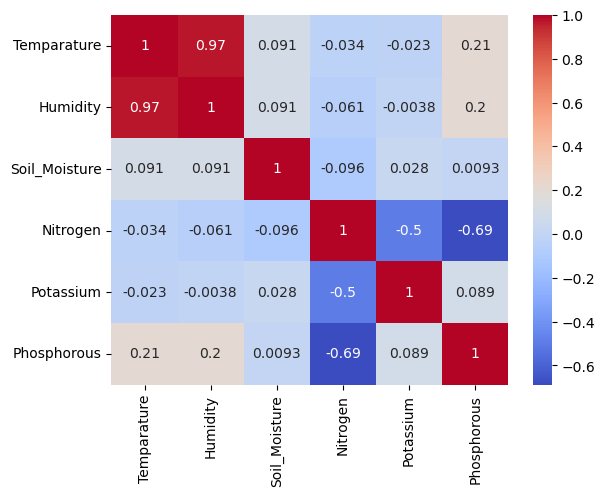

In [11]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [12]:
crop['Fertilizer_Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer_Name, dtype: int64

In [13]:
crop['Fertilizer_Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

C:\Users\owner\AppData\Local\Temp\ipykernel_4500\1035871582.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['Nitrogen'])


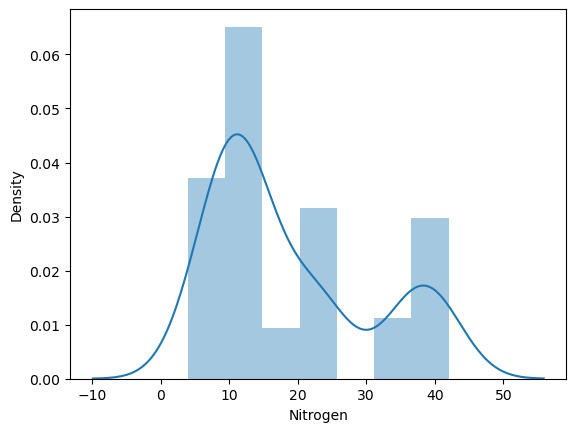

In [14]:
import  matplotlib.pyplot as plt
sns.distplot(crop['Nitrogen'])
plt.show()

C:\Users\owner\AppData\Local\Temp\ipykernel_4500\2844889231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['Phosphorous'])


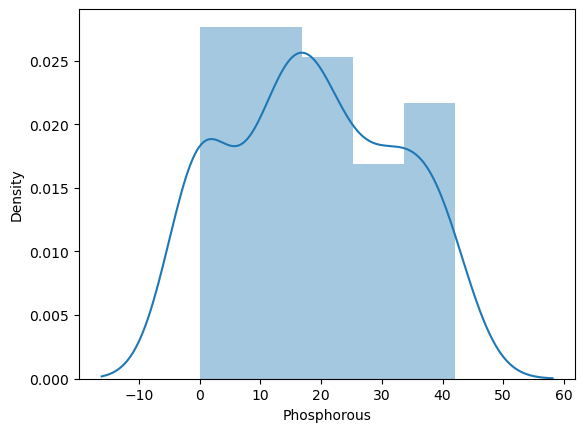

In [15]:
import  matplotlib.pyplot as plt
sns.distplot(crop['Phosphorous'])
plt.show()

C:\Users\owner\AppData\Local\Temp\ipykernel_4500\1082374781.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['Potassium'])


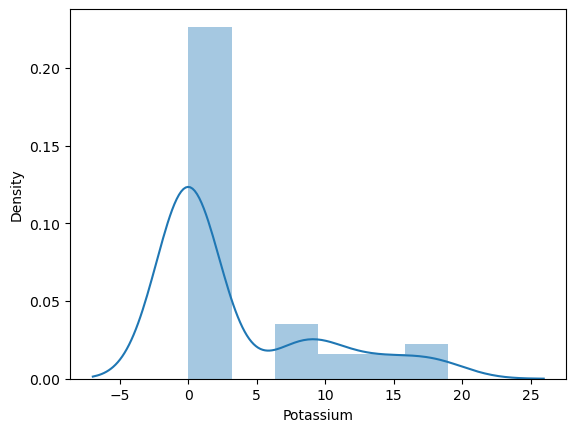

In [16]:
import  matplotlib.pyplot as plt
sns.distplot(crop['Potassium'])
plt.show()

In [17]:
crop_dict={
    'Urea':1,
    'DAP':2,
    '28-28':3,
    '14-35-14':4,
    '20-20':5,
    '17-17-17':6,
    '10-26-26':7  
}
crop['Fertilizer_Name']=crop['Fertilizer_Name'].map(crop_dict)

In [18]:
crop['Fertilizer_Name'].value_counts()

1    22
2    18
3    17
4    14
5    14
6     7
7     7
Name: Fertilizer_Name, dtype: int64

In [19]:
crop.head()

,Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,4
3,32,62,34,Red,Tobacco,22,0,20,3
4,28,54,46,Clayey,Paddy,35,0,0,1


In [20]:
crop['Soil_Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [21]:
crop_dict={
    'Sandy':1,
    'Loamy':2,
    'Black':3,
    'Red':4,
    'Clayey':5 
}
crop['Soil_Type']=crop['Soil_Type'].map(crop_dict)

In [22]:
crop['Soil_Type'].value_counts()

2    21
1    20
5    20
3    19
4    19
Name: Soil_Type, dtype: int64

In [23]:
crop.head()

,Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,1,Maize,37,0,0,1
1,29,52,45,2,Sugarcane,12,0,36,2
2,34,65,62,3,Cotton,7,9,30,4
3,32,62,34,4,Tobacco,22,0,20,3
4,28,54,46,5,Paddy,35,0,0,1


In [24]:
crop['Crop_Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [25]:
crop_dict={
    'Maize':1,
    'Sugarcane':2,
    'Cotton':3,
    'Tobacco':4,
    'Paddy':5,
    'Barley':6,
    'Wheat':7,
    'Millets':8,
    'Oil seeds':9,
    'Pulses':10,
    'Ground Nuts':11
    
}
crop['Crop_Type']=crop['Crop_Type'].map(crop_dict)

In [26]:
crop['Crop_Type'].value_counts()

2     13
3     12
8     11
5     10
10    10
7      9
4      7
6      7
9      7
11     7
1      6
Name: Crop_Type, dtype: int64

In [27]:
crop.head()

,Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,1,1,37,0,0,1
1,29,52,45,2,2,12,0,36,2
2,34,65,62,3,3,7,9,30,4
3,32,62,34,4,4,22,0,20,3
4,28,54,46,5,5,35,0,0,1


In [28]:
X=crop.drop('Fertilizer_Name',axis=1)
y=crop['Fertilizer_Name']

In [29]:
X

,Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,1,1,37,0,0
1,29,52,45,2,2,12,0,36
2,34,65,62,3,3,7,9,30
3,32,62,34,4,4,22,0,20
4,28,54,46,5,5,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,5,10,24,0,19
95,30,60,27,4,4,4,17,17
96,38,72,51,2,7,39,0,0
97,36,60,43,1,8,15,0,41


In [30]:
y

0     1
1     2
2     4
3     3
4     1
     ..
94    3
95    7
96    1
97    2
98    5
Name: Fertilizer_Name, Length: 99, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(79, 8)

In [33]:
X_test.shape

(20, 8)

In [34]:
X_train

,Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
49,33,64,51,1,1,5,9,29
70,26,52,39,5,10,21,0,23
68,25,50,40,5,10,6,19,16
15,31,62,49,3,2,10,13,14
39,29,58,34,1,8,15,0,37
...,...,...,...,...,...,...,...,...
60,28,54,41,5,5,36,0,0
71,31,62,32,4,4,39,0,0
14,26,52,31,4,11,14,0,41
92,36,68,41,4,11,41,0,0


In [35]:
y_train

49    4
70    3
68    7
15    6
39    2
     ..
60    1
71    1
14    2
92    1
51    5
Name: Fertilizer_Name, Length: 79, dtype: int64

In [36]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [37]:
X_train

array([[0.61538462, 0.63636364, 0.65      , 0.        , 0.        ,
        0.        , 0.47368421, 0.69047619],
       [0.07692308, 0.09090909, 0.35      , 1.        , 0.9       ,
        0.44444444, 0.        , 0.54761905],
       [0.        , 0.        , 0.375     , 1.        , 0.9       ,
        0.02777778, 1.        , 0.38095238],
       [0.46153846, 0.54545455, 0.6       , 0.5       , 0.1       ,
        0.13888889, 0.68421053, 0.33333333],
       [0.30769231, 0.36363636, 0.225     , 0.        , 0.7       ,
        0.27777778, 0.        , 0.88095238],
       [0.84615385, 0.81818182, 0.325     , 0.        , 0.5       ,
        0.05555556, 0.47368421, 0.71428571],
       [0.30769231, 0.36363636, 0.2       , 0.5       , 0.8       ,
        0.11111111, 0.36842105, 0.71428571],
       [0.38461538, 0.45454545, 0.375     , 0.        , 0.7       ,
        1.        , 0.        , 0.        ],
       [0.46153846, 0.54545455, 0.575     , 0.        , 0.        ,
        0.25      , 0.789473

In [38]:
y_train

49    4
70    3
68    7
15    6
39    2
     ..
60    1
71    1
14    2
92    1
51    5
Name: Fertilizer_Name, Length: 79, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [40]:
X_train

array([[ 0.76462082,  0.80219471,  0.71373089, -1.40978793, -1.59526543,
        -1.15292671,  0.91259936,  0.80677787],
       [-1.22988538, -1.23117583, -0.39185226,  1.42774701,  1.26174646,
         0.24967133, -0.63230099,  0.3465941 ],
       [-1.51481484, -1.57007092, -0.29972033,  1.42774701,  1.26174646,
        -1.06526433,  2.62915531, -0.19028696],
       [ 0.19476191,  0.46329962,  0.52946704,  0.00897954, -1.27781967,
        -0.71461482,  1.59922174, -0.34368155],
       [-0.37509701, -0.21449056, -0.8525119 , -1.40978793,  0.62685493,
        -0.27630294, -0.63230099,  1.42035622],
       [ 1.6194092 ,  1.47998489, -0.48398419, -1.40978793, -0.0080366 ,
        -0.97760196,  0.91259936,  0.88347516],
       [-0.37509701, -0.21449056, -0.94464383,  0.00897954,  0.9443007 ,
        -0.8022772 ,  0.56928817,  0.88347516],
       [-0.09016755,  0.12440453, -0.29972033, -1.40978793,  0.62685493,
         2.00291888, -0.63230099, -1.41744366],
       [ 0.19476191,  0.46329962

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [49]:
models = {
       'Logistic Regression': LogisticRegression(),
        'Naive Bayes': GaussianNB(),
        'Support Vector Machine': SVC(),
       'K-Nearest Neighbors': KNeighborsClassifier(),
       'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Bagging': BaggingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
       'Gradient Boosting': GradientBoostingClassifier(),
        'Extra Trees': ExtraTreeClassifier(),
}

In [50]:
for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
   
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")


Logistic Regression  with accuracy : 1.0
Naive Bayes  with accuracy : 1.0
Support Vector Machine  with accuracy : 0.85
K-Nearest Neighbors  with accuracy : 0.6
Decision Tree  with accuracy : 1.0
Random Forest  with accuracy : 0.95
Bagging  with accuracy : 1.0
AdaBoost  with accuracy : 0.7
Gradient Boosting  with accuracy : 0.95
Extra Trees  with accuracy : 0.8


In [53]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.95

In [54]:
def recommendation(Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous):
        features = np.array([[Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous]])
        transformed_features = ms.fit_transform(features)
        transformed_features = sc.fit_transform(transformed_features)
        prediction = rfc.predict(transformed_features).reshape(1,-1)
    
        return prediction[0]

In [55]:
Temparature=26
Humidity=52
Soil_Moisture=38
Soil_Type=3
Crop_Type=8
Nitrogen=37
Potassium=32
Phosphorous=12
predict = recommendation(Temparature,Humidity,Soil_Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous)
crop_dict = {1: "Urea  ", 2: "DAP", 3: "28-28", 4: "14-35-14", 5: "20-20 ", 6: "17-17-17 ", 7: "10-26-26"}
if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best fertilizer to be used ".format(crop))
else:
    print("Sorry are not able to recommend a proper fertilizer for this crop")

28-28 is a best fertilizer to be used 


In [56]:
predict

array([3], dtype=int64)

In [57]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))